## Random Forest Classifier/Regressor, Cross Validation, VarianceThreshold, PCA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

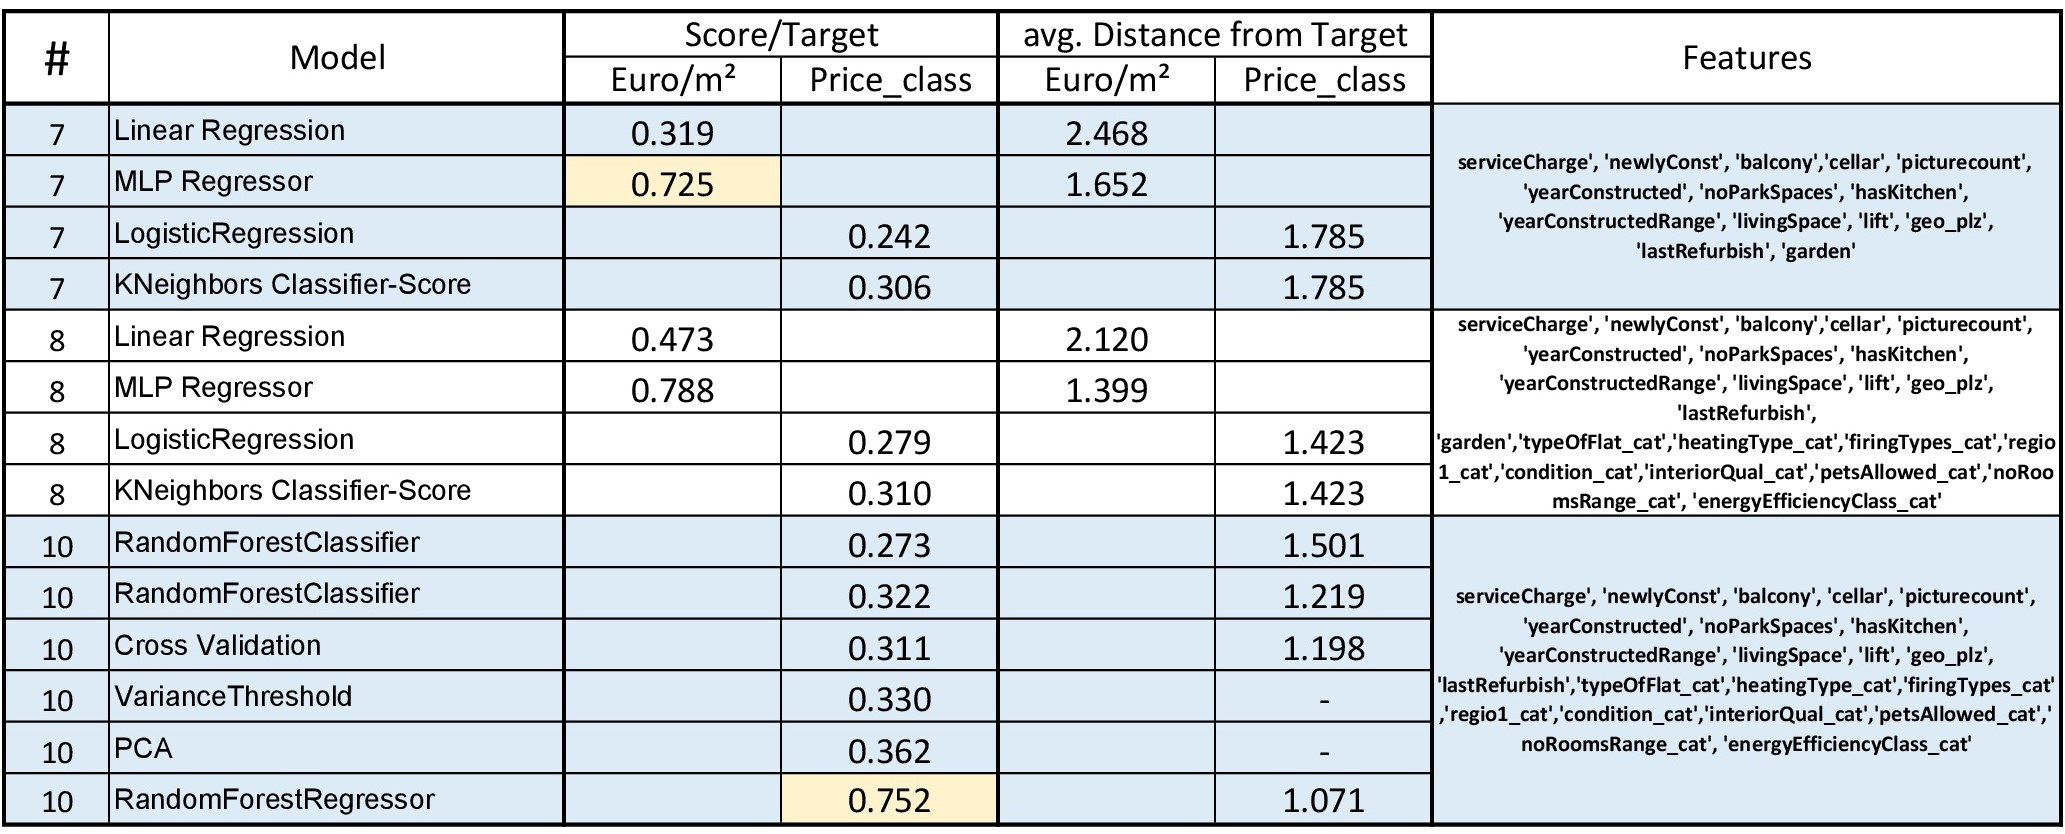

In [2]:
# load data set
pd.set_option('display.max_columns', None)
data = pd.read_csv('immo_cat.csv')
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden','cellar']
data[cols] = data[cols].replace({True:1,False:0})
data = data[['serviceCharge', 'newlyConst', 'balcony', 'cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat','price_class']].copy()
data.head(1)

,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,geo_plz,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat,price_class
0,245.0,0,0,1,6,1965.0,1.0,0,2.0,86.0,0,44269,2009.1,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61,4


In [3]:
y = data['price_class']
X = data.drop(['price_class'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later.
# it is not needed for a DecisionTree or RandomForest model-->no one hot encoding needed, but do for later

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
trainset=pd.concat([y_train, X_train ], axis=1)
trainset

,price_class,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,geo_plz,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
103504,8,250.0,0,1,1,18,2011.0,1.0,1,8.0,108.00,0,61476,2015.0,0.4,0.55,0.45,0.82,0.61,0.56,1.00,3.0,0.61
253547,2,69.0,0,0,1,8,1960.0,0.0,0,2.0,57.68,0,9114,2009.1,0.4,0.55,0.45,0.38,0.52,0.37,1.00,3.0,0.61
206819,7,165.0,1,1,0,13,2018.0,1.0,0,9.0,89.29,1,38302,2009.1,0.4,0.80,0.45,0.51,1.00,0.56,0.90,2.0,0.52
151794,3,55.0,0,1,1,1,1973.1,0.0,0,4.1,56.00,0,2827,2009.1,0.4,0.55,0.45,0.38,0.61,0.30,0.90,2.0,0.61
101568,5,139.0,0,1,1,3,1968.0,0.0,0,2.0,45.08,0,38116,2009.1,0.4,0.55,0.45,0.51,0.61,0.37,0.95,1.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,6,280.0,0,1,1,7,1971.0,1.0,1,3.0,95.36,0,75173,2019.0,0.4,0.55,0.45,0.81,0.52,0.56,0.95,2.0,0.55
86293,2,130.0,0,0,1,12,1992.0,1.0,0,5.0,62.79,0,9117,2009.1,0.4,0.55,0.45,0.38,0.61,0.37,0.90,3.0,0.61
122579,7,180.0,1,0,0,2,2018.0,0.0,0,9.0,57.63,1,59494,2009.1,0.4,0.55,0.45,0.51,0.61,0.37,0.95,2.0,1.00
152315,5,90.0,0,1,1,6,1995.0,1.0,0,5.0,29.81,0,1445,2009.1,0.4,0.55,0.45,0.38,0.57,0.37,0.95,1.0,0.61


In [5]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Random Forest Classifier

In [6]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred1 = clf.predict(X_test)
# display(y_test.value_counts())
# display(confusion_matrix(y_test, y_pred))

0.27269799484709306
0.27383219446622603


In [7]:
rfc = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))
# Make predictions on the test data
y_pred2 = rfc.predict(X_test)

0.27331410328217765
0.27420559351779245


### Cross Validation (Random Forest Classifier)

In [8]:
# For cross validation
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train, y_train)
print(np.mean(cross_val_scores))
y_pred3 = clf.predict(X_test)

0.2714190981357236


In [9]:
# from sklearn.model_selection import cross_val_score
# import statsmodels.api as sm
# X_added_constant = sm.add_constant(X_train)
# X_added_constant
# model = sm.OLS(y_train,X_added_constant).fit()
# model.summary()

### Variance Threshold

In [10]:
vt = VarianceThreshold(threshold=0.05)
X_vt = vt.fit_transform(X_train)
scores_vt = cross_val_score(rfc, X_vt, y_train, cv=5, scoring='accuracy')
scores_vt.mean()

0.2575519924748363

### PCA

In [11]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_train)
scores_pca = cross_val_score(rfc, X_pca, y_train, cv=5, scoring='accuracy')
scores_pca.mean()

0.2706536438111495

### RandomForestRegressor

In [12]:
regr = RandomForestRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

y_pred4 = regr.predict(X_test)

0.7623274740034941
0.7517037585966455


#### Distance (Random Forest Classifier 1)
-->calculates the average distance (difference) between target (price class) and prediction (predicted price class)

In [13]:
dist1=pd.concat([y_test], axis=1)
dist1['predicted'] = y_pred1
dist1['difference'] = round(((dist1['price_class']-dist1['predicted'])**2)**(1/2),2)
dist1

,price_class,predicted,difference
113987,2,3,1.0
257282,4,8,4.0
29929,5,4,1.0
37788,9,8,1.0
196338,4,3,1.0
...,...,...,...
163946,7,8,1.0
177453,7,3,4.0
144520,3,3,0.0
42789,8,4,4.0


In [14]:
dist1['difference'].mean()

1.5067958627385087

#### Distance (Random Forest Classifier 2)

In [15]:
dist2=pd.concat([y_test], axis=1)
dist2['predicted'] = y_pred2
dist2['difference'] = round(((dist2['price_class']-dist2['predicted'])**2)**(1/2),2)
dist2

,price_class,predicted,difference
113987,2,3,1.0
257282,4,8,4.0
29929,5,4,1.0
37788,9,8,1.0
196338,4,3,1.0
...,...,...,...
163946,7,8,1.0
177453,7,3,4.0
144520,3,3,0.0
42789,8,4,4.0


In [16]:
dist2['difference'].mean()

1.5009521675814943

#### Distance (Cross Validation)

In [17]:
dist3=pd.concat([y_test], axis=1)
dist3['predicted'] = y_pred3
dist3['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)
dist3

,price_class,predicted,difference
113987,2,3,1.0
257282,4,8,4.0
29929,5,4,1.0
37788,9,8,1.0
196338,4,3,1.0
...,...,...,...
163946,7,8,1.0
177453,7,3,4.0
144520,3,3,0.0
42789,8,4,4.0


In [18]:
dist3['difference'].mean()

1.5320749785295544

#### Distance (RandomForestRegressor)

In [19]:
dist4=pd.concat([y_test], axis=1)
dist4['predicted'] = y_pred4
dist4['difference'] = round(((dist4['price_class']-dist4['predicted'])**2)**(1/2),2)
dist4

,price_class,predicted,difference
113987,2,2.353711,0.35
257282,4,6.406460,2.41
29929,5,5.045565,0.05
37788,9,7.984580,1.02
196338,4,3.326566,0.67
...,...,...,...
163946,7,7.593560,0.59
177453,7,5.782614,1.22
144520,3,4.263117,1.26
42789,8,6.564440,1.44


In [20]:
dist4['difference'].mean()

1.0708291325940211